In [2]:
#인공지능 > 머신 러닝 > 딥러닝(by Nvidia) ; 머신러닝은 학습과 성능향상을 특징
#퍼셉트론 알고리즘 by 프랭크 로젠블랫 ->  입력신호에 대하여 각각 고유한 가중치와 임계치를 지님, 구조를 변경하지 않으면서 여러 회로를 만들 수 있음

#예시 : (w1,w2,theta)를 이용한 And 연산자
def AND(x1,x2):
    w1=0.5
    w2=0.5
    theta=0.7
    if w1*x1 + w2*x2 > theta:
        return 1
    else:
        return 0
AND(1,0)
# w1=-0.5, w2=-0.5, theta=-0.7로 설정하면 NAND, (0.5,0.5,0.2,)로 설정하면 OR 연산자가 됨

0

In [3]:
#예시2: (w1,w2,theta)를 이용한 XOR 논리회로 -> 다층 퍼셉트론 구조 이용

def NAND(x1,x2):
    w1=-0.5
    w2=-0.5
    theta=-0.7
    if w1*x1 + w2*x2 > theta:
        return 1
    else:
        return 0
    
def OR(x1,x2):
    w1=0.5
    w2=0.5
    theta=0.2
    if w1*x1 + w2*x2 > theta:
        return 1
    else:
        return 0
    
def XOR(x1,x2):
    return AND(NAND(x1,x2),OR(x1,x2))
XOR(0,1)

1

In [6]:
XOR(1,1) # 위의 결과는 신경망->신경망으로 정보가 옮겨가는 것과 비슷, 그래서 신경망구조

0

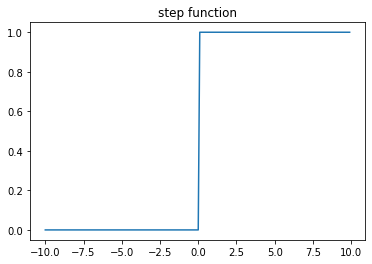

In [7]:
#활성화 함수 : 입력 신호의 총합이 임계값을 넘어 설 때 특정 값을 출력하는 함수
# (i) 계단함수
import numpy as np
import matplotlib.pyplot as plt

def stepfunc(x):
    return np.where( x<=0, 0, 1) #부등식을 만족하면 0, 만족하지 못하면 1
x= np.arange(-10,10,0.1)
y = stepfunc(x)

plt.plot(x,y)
plt.title('step function')
plt.show()


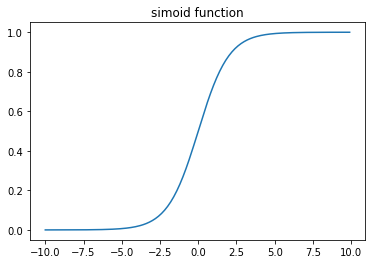

In [8]:
#(ii) 시그모이드 함수 -> S자 함수, y = 1/(1+e^-x)
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))
x = np.arange(-10,10,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.title('simoid function')
plt.show()

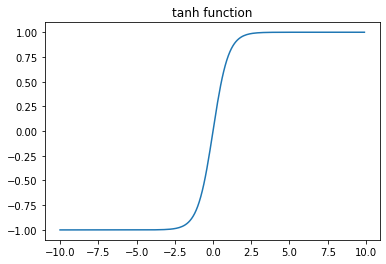

In [9]:
#(iii) tanh함수 : 쌍곡탄젠트함수, 시그모이드와 같은 모양이지만 -1에서 1 사이의 값을 나타냄 y = (e^x - e^-x) / (e^x + e^-x)
import numpy as np
import matplotlib.pyplot as plt
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

x = np.arange(-10,10,0.1)
y = tanh(x)

plt.plot(x,y)
plt.title('tanh function')
plt.show()

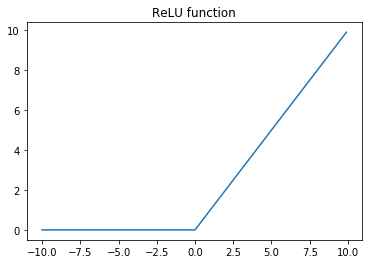

In [11]:
# (iv) ReLU함수(Rectified linear unit함수) -> 음수값은 0으로 출력
import numpy as np
def relu(x):
    return np.maximum(0,x)
x= np.arange(-10,10,0.1)
y=relu(x)
plt.plot(x,y)
plt.title('ReLU function')
plt.show()

In [12]:
#(v)소프트맥스 함수 : 값들을 정규화, y = e^x / sigma(k=1->n) e^x_k
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))
x = np.arange(1,10,1)
y = softmax(x)
y

array([2.12078996e-04, 5.76490482e-04, 1.56706360e-03, 4.25972051e-03,
       1.15791209e-02, 3.14753138e-02, 8.55587737e-02, 2.32572860e-01,
       6.32198578e-01])

In [21]:
#다층 퍼셉트론 : 퍼셉트론을 여러층으로 구성 ; 입력층(0층) - 은닉층1 , 은닉층2,... (n개) - 출력층(n+1층) ; 은닉층이 무수히 많은 신경망을 심층 신경망이라고 부름
# a(1)_2는 1층의 퍼셉트론 중 2번째를 의미, (1)는 위첨자, 2는 아래첨자
#w(n)_ij 는 n층의 가중치 중에서 n-1층의 j번째 퍼셉트론으로부터 n층의 i번째 퍼셉트론으로 향하는 가중치
#b(n)_i 는 n층의 i번째 퍼셉트론으로 향하는 편향; 가중치가 각각의 입력신호에 대하 중요도를 조절하는 매개변수라면 편향은 퍼셉트론이 얼마나 쉽게 활성화하는 지를 조절하는 매개변수
#h()는 은닉층의 활성화 함수

# a(1)_1 = b(1)_1 + x1*w(1)_11 + x2* w(1)_12
#이를 행렬로 나타내면 A(1) = XW(1) + B(1) = (a(1)_1 a(1)_2 a(1)_3) = (x1 x2)(w(1)_11 w(1)_21 w(1)_31 ; w(1)_21 w(1)_22 w(1)_32) + (b(1)_1 b(1)_2 b(1)_3)
#은닉층을 넘파이로 구현하면
import numpy as np
X = np.array([10,20])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([1,2,3])

def sigmoid(x):
    return 1 / (1+np.exp(-x))

A1 = np.dot(X,W1) + B1
Z1 = sigmoid(A1)

In [22]:
Z1

array([0.99752738, 0.99999774, 1.        ])

In [26]:
#출력층까지의 신호전달 과정을 구현해보면 ; 출력층의 활성화함수는 σ() = s(), 회귀문제는 항등함수를, 2클래스 분류 문제는 시그모이드함수를, 다중 클래스 분류 문제는 소프트맥스함수를 보통 사용
#출력층의 퍼셉트론은 a(2)_1 = b(2)_1 + z(1)_1*w(2)_11 + z(1)_2*w(2)_12 + z(1)_13*w(2)_12
#행렬로 표현하면 A(2) = Z(1)W(2) + B(2)
W2 = np.array([[0.1, 0.4], [0.2,0.5], [0.3,0.6]] )
B2 = np.array([0.1,0.2])
A2 = np.dot(Z1,W2) + B2
Y = sigmoid(A2)

In [27]:
Y

array([0.66813285, 0.84540537])

In [1]:
#딥러닝
# 심층신경망의 과적합, 느린학습문제(1990)로 암흑기 -> 2006 제프리 힌튼 < 신경망으로 데이터차원 줄이기 > 발표, 딥러닝의 시작 -> 드롭아웃 등의 기법 발전 -> 머신러닝과 달리 딥러닝은 데이터입력에서부터 결과,출력까지 사람 개입 배제

#텐서플로 기초 ; pip install tensorflow 선행(pip X conda로 할것, 현재 아나콘다에서 쓰는 파이썬이 3.8x 버전이라 텐서플로 작동X)

#텐서플로에서 문자열 출력하기
#텐서플로 -> 코랩에서 실행 or Anaconda prompt - 이미 설치된 가상환경(virtualtensor3.7)에 접속 : conda activate virtualtensor - jupyter notebook 접속 ; 가상환경 만들고 싶으면 conda create -n 이름 python=버전(여기 띄어쓰기 없어야 됨!!!) / 삭제는 conda env remove -n 이름, 생성된 목록 보려면 conda env list, 비활성화는 conda deactivate
import tensorflow as tf

In [2]:
hello = tf.constant("hello, tenserflow")

In [3]:
print(hello)

tf.Tensor(b'hello, tenserflow', shape=(), dtype=string)


step|    w|    b| cost
----|-----|-----|-----
0001|0.78|0.72|1.62


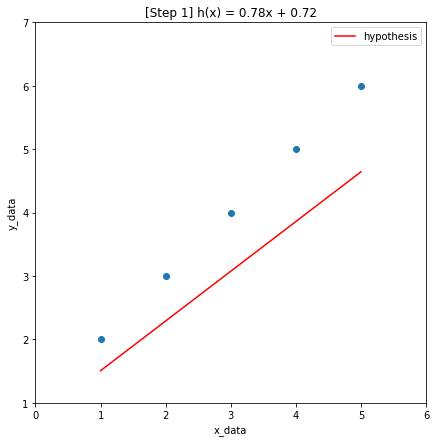

0003|0.90|0.76|0.55


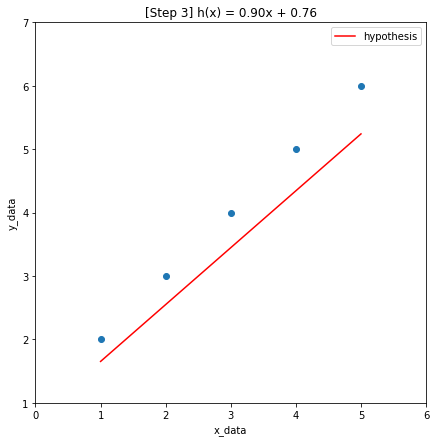

0005|0.96|0.78|0.19


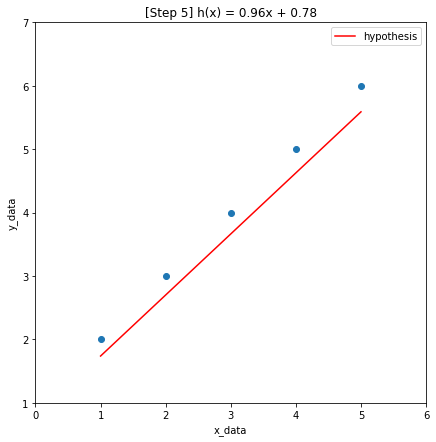

0010|1.03|0.80|0.02


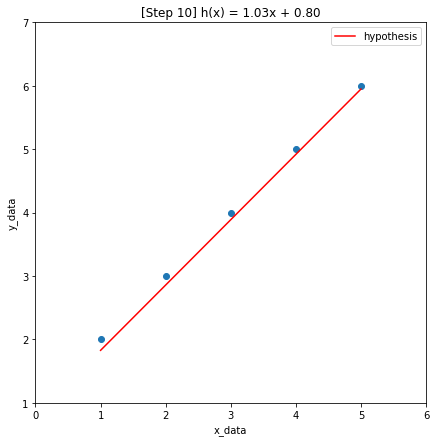

1000|1.00|0.99|0.00


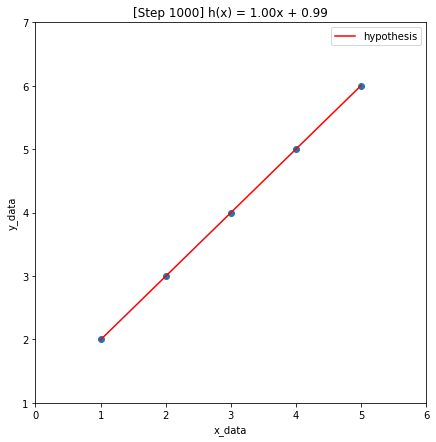

1100|1.00|1.00|0.00


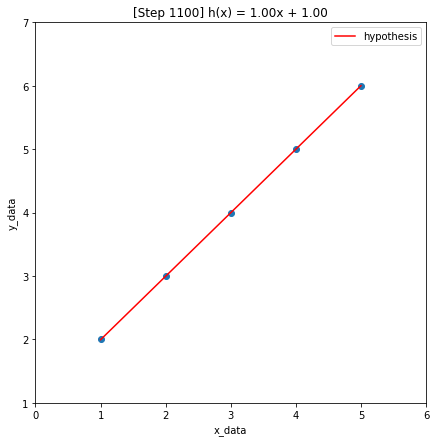

In [4]:
#virtualtensor3.7
import matplotlib.pyplot as plt
import tensorflow as tf

x_data = [1,2,3,4,5]
y_data = [2,3,4,5,6]

w = tf.Variable(0.7) #가중치 w를 임의의 값으로 초기화
b = tf.Variable(0.7) #임의의 값
learn_rate = 0.01 #학습률(보통 0.01 ~ 0.001, 값이 작을 수록 시간이 오래 걸림)

#경사 하강 알고리즘
print(f'step|    w|    b| cost')
print(f'----|-----|-----|-----')

for i in range(1, 11001): #1회부터 1100회까지 반복해서 학습
    with tf.GradientTape() as tape: #내부의 계산과정을 tape에 기롭 -> 나중에 tape.gradient()함수로 미분값을 구함
        hypothesis = w*x_data + b
        cost = tf.reduce_mean((hypothesis - y_data) **2) #손실 비용을 오차제곱평균으로 구함 , tf.losses.mean_squared_error(hypothesis - y_data)라고 해도 무관 ; 손실비용을 낮추는 방향으로 경사를 타고 내려간다고 해서 하강 경사 알고리즘
    dw, db = tape.gradient(cost, [w,b])

    w.assign_sub(learn_rate * dw)
    b.assign_sub(learn_rate * db)

    if i in [1,3,5,10, 1000, 1100]:
        print(f'{i:04d}|{w.numpy():.2f}|{b.numpy():.2f}|{cost:.2f}')
        plt.figure(figsize=(7,7))
        plt.title(f'[Step {i:d}] h(x) = {w.numpy():.2f}x + {b.numpy():.2f}')
        plt.plot(x_data, y_data, 'o')
        plt.plot(x_data, w * x_data + b, 'r', label = 'hypothesis')
        plt.xlabel('x_data')
        plt.ylabel('y_data')
        plt.xlim(0,6)
        plt.ylim(1,7)
        plt.legend(loc='best')
        plt.show() 

In [1]:
from Investar import Analyzer

In [2]:
import tensorflow as tf
import bs4
import numpy as np
import pandas as pd